In [ ]:
# Check vertical flux calculation in WAM2layers

from wam2layers.tracking.backtrack import calculate_fv

s0 = [10, 6]  # states at timestep 0, [lower, upper]
s1 = [9, 8]  # states at timestep 1, [lower, upper]

s1 - s0 = [-1, +2]  # increment from s0 to s1 [lower, upper]

residuals = (s1 - s0) - advection(...) - sources + sinks

calculate_fv(fluxes, states_prev, states_next)

In the absence of horizontal advection & sources of sinks (& forward tracking)


layer     | Equation                 | Condition             | Fz                                    | S(n) | S(n+1) | dS = S(n+1) - S(n) | With values                    | Final result |
----------|--------------------------|-----------------------|---------------------------------------|------|--------|--------------------|--------------------------------|--------------|
2 (upper) |         dS2 = -Fz + err2 | err2 / errT = S2 / ST |            Fz = -dS2 + S2 / ST * errT |   10 |      8 | -2                 | = -(-2) + 8/15 * -1            | = 2-8/15 |
1 (lower) |         dS1 = +Fz + err1 | err1 / errT = S1 / ST |            Fz =  dS1 - S1 / ST * errT |    6 |      7 |  1                 | = 1 - 7/15 * -1                | = 1+7/15 |
T (total) | dST = err2 + err1 = errT | 1 = 1                 | 2Fz = dS1 - dS2 + (S2-S1) / ST * errT |   16 |     15 | -1                 | =  1 -(-2) + (8-7) / 15 * (-1) | = 3-1/15 = 2+14/15 | 

Note: S1, S2, ST are evaluated at n+1

```
These are equivalent:
(1): err1 / S1 = err2 / S2
(2): err1 / err2 = S1 / S2

Using column totals:
(3): ST = S1 + S2          or:   S1 = ST - S2
(4): errT = err1 + err2    or: err1 = errT - err2

Substituting (3) and (4) in (2) leads to

(5):  (errT - err2) / err2 = (ST - S2) / S2
or : errT/err2 - err2/err2 = ST/S2 - S2/S2
or :         errT/err2 - 1 = ST/S2 - 1
or :             errT/err2 = ST/S2
or :             err2/errT = S2/ST
```

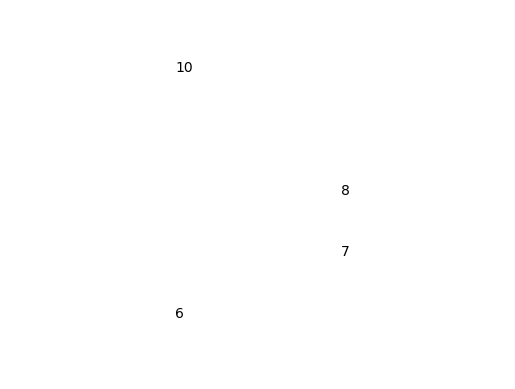

In [11]:
import numpy as np
import matplotlib.pyplot as plt

S0 = np.array([6, 10])
S1 = np.array([7, 8])
F = np.array([0, 0])

residuals = (S1 - S0) - F
Fz = residuals[0] - S1[0] / S1.sum() * residuals.sum()
# Fz = -residuals[1] + S1[0] / S1.sum() * residuals.sum()

fig, ax = plt.subplots()
ax.set_xlim(-1, 2)
ax.set_ylim(5, 11)
ax.set_axis_off()
ax.set_xticks
ax.text(0, S0[0], f"{S0[0]}")
ax.text(0, S0[1], f"{S0[1]}")
ax.text(1, S1[0], f"{S1[0]}")
ax.text(1, S1[1], f"{S1[1]}")
plt.show()

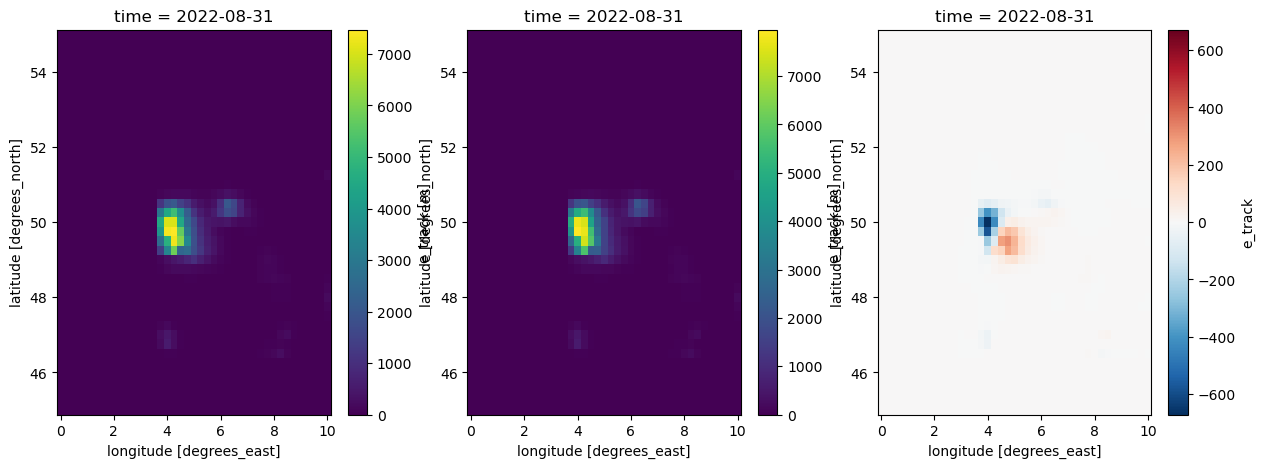

In [2]:
import matplotlib.pyplot as plt
import xarray as xr

output =  xr.open_dataset("/home/peter/wam2layers/WAM2layers/tests/tmp/output_data/backtrack_2022-08-31T18-00.nc")
expected_output = xr.open_dataset(
    "/home/peter/wam2layers/WAM2layers/tests/test_data/verify_output/backtrack_2022-08-31T18-00.nc"
)

fig, [ax0, ax1, ax2] = plt.subplots(1, 3, figsize=(15, 5))
expected_output["e_track"].assign_attrs(long_name='e_track').plot(ax=ax0)
output["e_track"].assign_attrs(long_name='e_track').plot(ax=ax1)
(expected_output["e_track"] - output["e_track"]).plot(ax=ax2)